## Importing Libraries 

In [1]:
# For ML models
import shap
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC ,SVR
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
# For Data Processing
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Miscellaneous
import os
import random


import warnings
warnings.filterwarnings('ignore')

## Setting up sklearnex to speed up training

In [2]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# <b>2 <span style='color:#4285f4'>|</span> About the Dataset</b>

In [3]:
df_stroke = pd.read_csv('E:/IMARTICUS/DATA SET/healthcare-dataset-stroke-data.csv')
#del df['id']
df_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Column Descriptions
- `id`: unique identifier
- `gender`: "Male", "Female" or "Other"
- `age`: age of the patient
- `hypertension`: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- `heart_disease`: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- `ever_married`: "No" or "Yes"
- `work_type`: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- `Residence_type`: "Rural" or "Urban"
- `avg_glucose_level`: average glucose level in blood
- `bmi`: body mass index
- `smoking_status`: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- `stroke`: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in `smoking_status` means that the information is unavailable for this patient

Categorical Features  
`gender`, `hypertension`, `heart_disease`, `ever_married`, `work_type`, `Residence_type`, `smoking_status`, `stroke`  
Continuous Features  
`age`, `avg_glucose_level`, `bmi`  

I will replace all `0` as `No` and all `1` as `Yes` for now, for visualization purposes in the EDA section of this notebook

In [43]:
for col in ['hypertension', 'heart_disease', 'stroke']:
    df_stroke[col] = df_stroke[col].apply(lambda x: {1:'Yes', 0:'No'}[x])

## Data Exploration And Data Analysis

In [44]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   object 
 3   heart_disease                   5110 non-null   object 
 4   ever_married                    5110 non-null   int32  
 5   Residence_type                  5110 non-null   int32  
 6   avg_glucose_level               5110 non-null   float64
 7   bmi                             5110 non-null   float64
 8   stroke                          5110 non-null   object 
 9   gender_Female                   5110 non-null   uint8  
 10  gender_Male                     5110 non-null   uint8  
 11  gender_Other                    5110 non-null   uint8  
 12  work_type_Govt_job              51

In [45]:
df_stroke.describe()

,id,age,ever_married,Residence_type,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,0.527154,0.656164,0.508023,0.390622,0.295959,0.585910,0.413894,0.000196,0.128571,0.004305,0.572407,0.160274,0.134442,0.302153,0.173190,0.370254,0.154403
std,21161.721625,0.275764,0.475034,0.499985,0.166643,0.078874,0.492612,0.492578,0.013989,0.334758,0.065480,0.494778,0.366896,0.341160,0.459236,0.378448,0.482920,0.361370
min,67.000000,0.000976,0.000000,0.000000,0.202841,0.105533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17741.250000,0.304878,0.000000,0.000000,0.284261,0.243852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36932.000000,0.548780,1.000000,1.000000,0.338136,0.290984,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,54682.000000,0.743902,1.000000,1.000000,0.419850,0.336066,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,72940.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
df_stroke.isnull().sum()

id                                0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [47]:
df_stroke.shape

(5110, 21)

## Missing Values Visualization

In [48]:
fig = px.imshow(df_stroke.isna().transpose(),color_continuous_scale="Blues")
fig.show()

#### Only `bmi` has *some* missing values. So, to keep things simple, I will delete the rows that contains those missing values.

In [49]:
df_stroke['bmi']=df_stroke['bmi'].fillna(df_stroke['bmi'].mode()[0])

## Column Statistics (of numerical data)

In [50]:
df_stroke.describe()[1:][['age','avg_glucose_level','bmi']].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
age,0.527154,0.275764,0.000976,0.304878,0.548780,0.743902,1.000000
avg_glucose_level,0.390622,0.166643,0.202841,0.284261,0.338136,0.419850,1.000000
bmi,0.295959,0.078874,0.105533,0.243852,0.290984,0.336066,1.000000


## Column Statistics (of categorical data)

In [51]:
fig = make_subplots(
    rows=4, cols=2, subplot_titles=("gender", "hypertension",
                                    "heart_disease","ever_married",
                                    "work_type", "Residence_type",
                                    'smoking_status', 'stroke'),
    specs=[[{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}]],
)


colours = ['#ea4335', '#4285f4', '#fbbc05', '#34a853']

fig.add_trace(go.Pie(labels=np.array(df_stroke['gender'].value_counts().index),
                     values=[x for x in df_stroke['gender'].value_counts()],
                     textinfo='label+percent', rotation=-45, hole=.35,
                     marker_colors=colours),
              row=1, col=1)

fig.add_trace(go.Pie(labels=np.array(df_stroke['hypertension'].value_counts().index),
                     values=[x for x in df_stroke['hypertension'].value_counts()],
                     textinfo='label+percent', hole=.35,
                     marker_colors=colours),
              row=1, col=2)

fig.add_trace(go.Pie(labels=np.array(df_stroke['heart_disease'].value_counts().index),
                     values=[x for x in df_stroke['heart_disease'].value_counts()],
                     textinfo='label+percent', rotation=-45, hole=.35,
                     marker_colors=colours),
              row=2, col=1)

fig.add_trace(go.Pie(labels=np.array(df_stroke['ever_married'].value_counts().index),
                     values=[x for x in df_stroke['ever_married'].value_counts()],
                     textinfo='label+percent', rotation=-45, hole=.35,
                     marker_colors=colours),
              row=2, col=2)

fig.add_trace(go.Pie(labels=np.array(df_stroke['work_type'].value_counts().index),
                     values=[x for x in df_stroke['work_type'].value_counts()],
                     textinfo='label+percent', hole=.35,
                     marker_colors=colours),
              row=3, col=1)

fig.add_trace(go.Pie(labels=np.array(df_stroke['Residence_type'].value_counts().index),
                     values=[x for x in df_stroke['Residence_type'].value_counts()],
                     textinfo='label+percent', hole=.35,
                     marker_colors=colours),
              row=3, col=2)

fig.add_trace(go.Pie(labels=np.array(df_stroke['smoking_status'].value_counts().index),
                     values=[x for x in df_stroke['smoking_status'].value_counts()],
                     textinfo='label+percent', rotation=-45, hole=.35,
                     marker_colors=colours),
              row=4, col=1)

fig.add_trace(go.Pie(labels=np.array(df_stroke['stroke'].value_counts().index),
                     values=[x for x in df_stroke['stroke'].value_counts()],
                     rotation=-45, textinfo='label+percent', hole=.35,
                     marker_colors=colours),
              row=4, col=2)

fig.update_layout(height=2000, font=dict(size=14), showlegend=True)

fig.show()

KeyError: 'gender'

# <b>3 <span style='color:#4285f4'>|</span> Exploratory Analysis</b>

<h2>3.1 <span style='color:#4285f4'>|</span> Visualization of Continuous Data</h2>

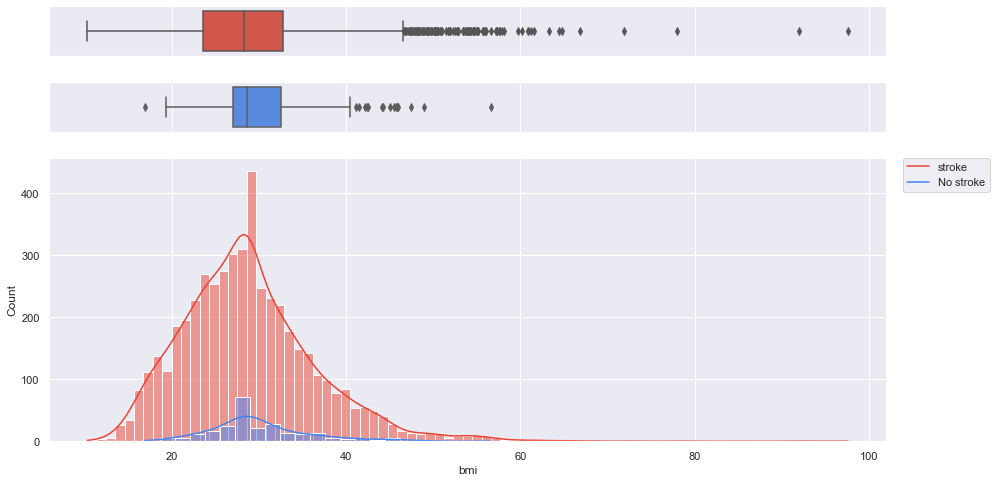

In [13]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
# assigning a graph to each ax
sns.boxplot(x=df_stroke[df_stroke['stroke']=='Yes']["bmi"], ax=ax_box1, color="#ea4335")
sns.histplot(df_stroke[df_stroke['stroke']=='Yes'], x="bmi", ax=ax_hist, kde=True, color="#ea4335")

sns.boxplot(x=df_stroke[df_stroke['stroke']=='No']["bmi"], ax=ax_box2, color='#4285f4')
sns.histplot(df_stroke[df_stroke['stroke']=='No'], x="bmi", ax=ax_hist, kde=True, color='#4285f4')
 
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['stroke', 'No stroke'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

### Insights
- People who had a stroke have a slightly higher bmi than those who never had a stroke

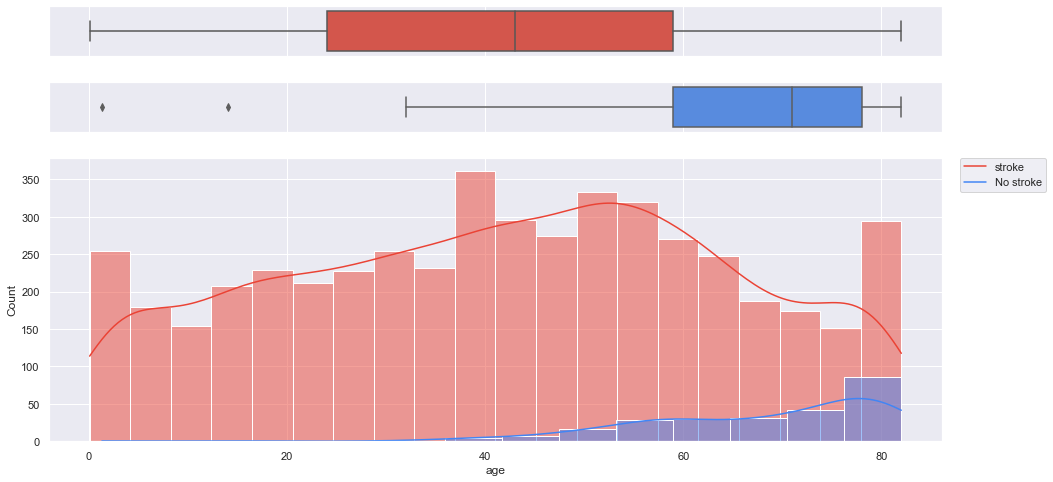

In [14]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
# assigning a graph to each ax
sns.boxplot(x=df_stroke[df_stroke['stroke']=='Yes']["age"], ax=ax_box1, color="#ea4335")
sns.histplot(df_stroke[df_stroke['stroke']=='Yes'], x="age", ax=ax_hist, kde=True, color="#ea4335")

sns.boxplot(x=df_stroke[df_stroke['stroke']=='No']["age"], ax=ax_box2, color='#4285f4')
sns.histplot(df_stroke[df_stroke['stroke']=='No'], x="age", ax=ax_hist, kde=True, color='#4285f4')
 
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['stroke', 'No stroke'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

### Insights
- Most people having a stroke are old people

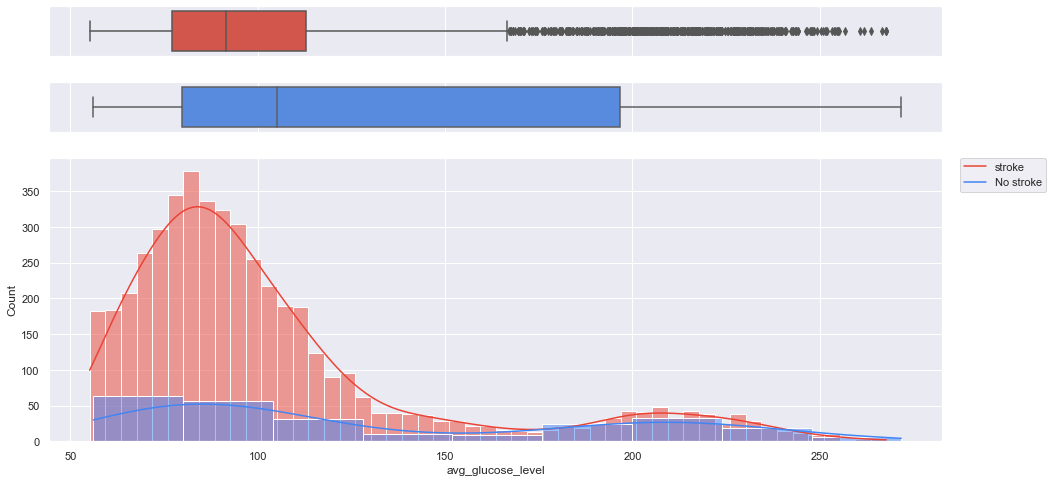

In [15]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
# assigning a graph to each ax
sns.boxplot(x=df_stroke[df_stroke['stroke']=='Yes']["avg_glucose_level"], ax=ax_box1, color="#ea4335")
sns.histplot(df_stroke[df_stroke['stroke']=='Yes'], x="avg_glucose_level", ax=ax_hist, kde=True, color="#ea4335")

sns.boxplot(x=df_stroke[df_stroke['stroke']=='No']["avg_glucose_level"], ax=ax_box2, color='#4285f4')
sns.histplot(df_stroke[df_stroke['stroke']=='No'], x="avg_glucose_level", ax=ax_hist, kde=True, color='#4285f4')
 
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['stroke', 'No stroke'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

### Insights
- Most people having a stroke usually have a higher Average glucose level than those who never had a stroke

<h2>3.2 <span style='color:#4285f4'>|</span> Visualization of Categorical Data</h2>

In [16]:
fig = px.histogram(df_stroke, x="gender", color='stroke', color_discrete_map = {'Yes':'#ea4335','No':'#4285f4'})
fig.show()

### Insights
- 141 Females had a stroke, and 108 males had a stroke
- It cannot be concluded that Females get more strokes than Males because the number of Females tested in this dataset is much higher than the number of Males tested

In [17]:
fig = px.histogram(df_stroke, x="hypertension", color='stroke', color_discrete_map = {'Yes':'#ea4335','No':'#4285f4'})
fig.show()

### Insights
- The number of people who has hypertension is much lower than the number of people who do not
- The proportion of people who had a stroke in the `hypertension` category is much higher than the proportion of people who had a stroke in the `No hypertension` category
- But the number of people who had hypertension is significantly lower than the number of people who didn't, so it cannot be confidently concluded that people with hypertension is more likely to suffer from a stroke than people with no hypertension

In [18]:
fig = px.histogram(df_stroke, x="heart_disease", color='stroke', color_discrete_map = {'Yes':'#ea4335','No':'#4285f4'})
fig.show()

### Insights
- The number of people who had heart disease is much lower than the number of people who did not
- The proportion of people who had a stroke in the `heart_disease` category is much higher than the proportion of people who had a stroke in the `No heart_disease` category
- But the number of people who had heart disease is significantly lower than the number of people who didn't, so it cannot be confidently concluded that people with heart disease is more likely to suffer from a stroke than people with no heart disease

In [19]:
fig = px.histogram(df_stroke, x="ever_married", color='stroke', color_discrete_map = {'Yes':'#ea4335','No':'#4285f4'})
fig.show()

### Insights
- Most people who had a stroke are married

In [20]:
fig = px.histogram(df_stroke, x="work_type", color='stroke', color_discrete_map = {'Yes':'#ea4335','No':'#4285f4'})
fig.show()

### Insights
- Most people who had a stroke work at a private company

In [21]:
fig = px.histogram(df_stroke, x="Residence_type", color='stroke', color_discrete_map = {'Yes':'#ea4335','No':'#4285f4'})
fig.show()


### Insights
- The likelihood of having a stroke is the same for living in an urban region and in a rural region

In [22]:
fig = px.histogram(df_stroke, x="smoking_status", color='stroke', color_discrete_map = {'Yes':'#ea4335','No':'#4285f4'})
fig.show()

In [23]:
df_stroke.corr()

,id,age,avg_glucose_level,bmi
id,1.000000,0.003538,0.001092,0.003622
age,0.003538,1.000000,0.238171,0.325553
avg_glucose_level,0.001092,0.238171,1.000000,0.168301
bmi,0.003622,0.325553,0.168301,1.000000


<AxesSubplot:>

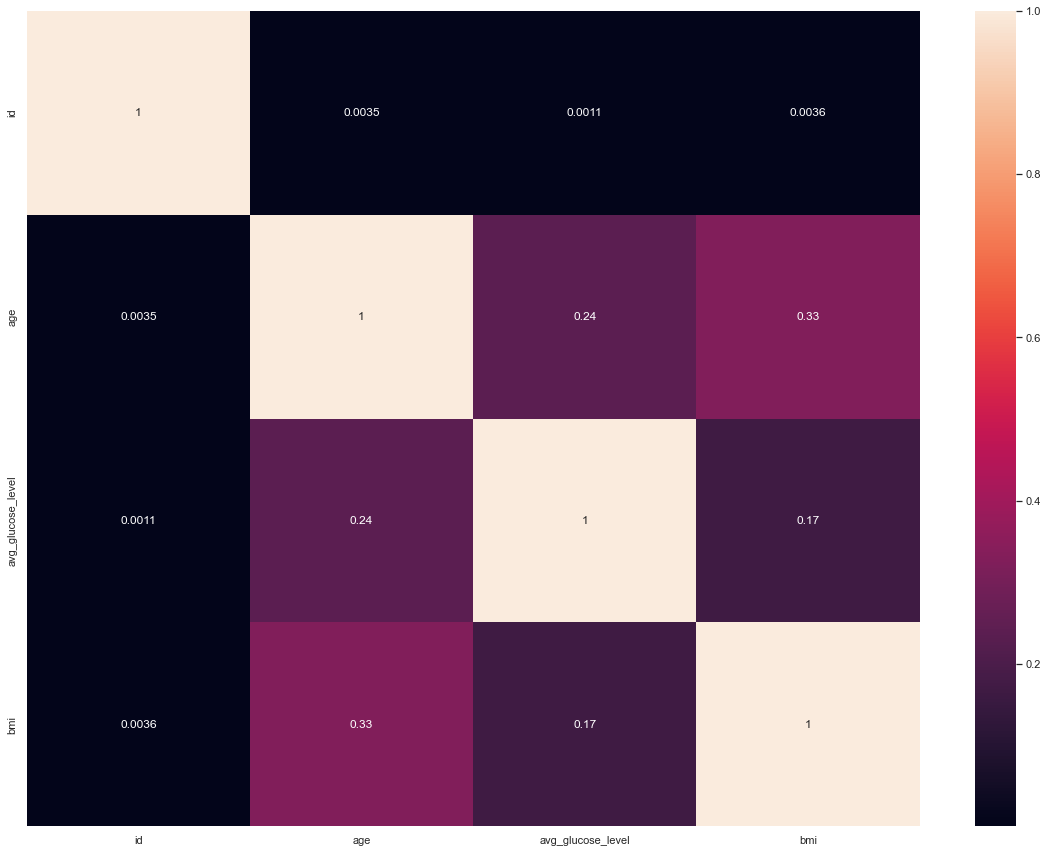

In [24]:
plt.figure(figsize=(20,15))
sns.heatmap(df_stroke.corr(),annot=True)

### Insights
- `smoking_status` does not have much influence on the probability of having a stroke

# <b>4 <span style='color:#4285f4'>|</span> Data Cleaning</b>

<h2>4.1 <span style='color:#4285f4'>|</span> Normalizing Continuous Features</h2>  

In [25]:
df_stroke.describe()[['age','avg_glucose_level', 'bmi']].T[['min', 'max']].style.background_gradient(cmap='Blues')

,min,max
age,0.080000,82.000000
avg_glucose_level,55.120000,271.740000
bmi,10.300000,97.600000


These continuous have different ranges, so I am normalizing them to be between 0 and 1

In [26]:
for col in ['age', 'avg_glucose_level', 'bmi']:
    df_stroke[col] = df_stroke[col]/df_stroke[col].max()

<h2>4.2 <span style='color:#4285f4'>|</span> Encoding Categorical Features</h2>  

In [27]:
print('\nCategorical Columns\n')
df_stroke.select_dtypes(include=['O']).nunique()


Categorical Columns



gender            3
hypertension      2
heart_disease     2
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
stroke            2
dtype: int64

Some categorical columns have 2 unique values, and some have more than 2 unique values.  
Here, I will convert the columns with 2 unique values to binary (either 1 or 0)  
And one-hot encode the other categorical columns which has more than 2 unique values  

In [28]:
# Integer encode columns with 2 unique values
for col in ['hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'stroke']:
    le = LabelEncoder()
    df_stroke[col] = le.fit_transform(df_stroke[col])
# One-hot encode columns with more than 2 unique values
df_stroke = pd.get_dummies(df_stroke, columns=['gender', 'work_type', 'smoking_status'], prefix = ['gender', 'work_type', 'smoking_status'])

<h2>4.3 <span style='color:#4285f4'>|</span> Train-Val Split</h2>  

In [29]:
features = np.array(df_stroke[[col for col in df_stroke.columns if col!='stroke']])
labels = np.array(df_stroke['stroke'])

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

# <b>5 <span style='color:#4285f4'>|</span> Models</b>

In [30]:
model_comparison = {}

## <span style='color:#4285f4'>|</span> DecisionTreeClassifier</h2>  

In [31]:
parameters = {'max_depth': [1,2,3,4,5,6]}

Tree_model = DecisionTreeClassifier()

clf = GridSearchCV(Tree_model, parameters)
print("Searching for best hyperparameters ...")
clf.fit(x_train, y_train)
print(f'Best Hyperparameters: {clf.best_params_}')

y_pred = clf.predict(x_test)
model_comparison['DecisionTreeClassifier'] = [accuracy_score(y_test,y_pred), f1_score(y_test,y_pred, average='weighted')]
print('\n')
print(classification_report(y_test,y_pred, zero_division=1, digits=3))

Searching for best hyperparameters ...
Best Hyperparameters: {'max_depth': 1}


              precision    recall  f1-score   support

           0      1.000     0.000     0.000        54
           1      0.947     1.000     0.973       968

    accuracy                          0.947      1022
   macro avg      0.974     0.500     0.486      1022
weighted avg      0.950     0.947     0.921      1022



## <span style='color:#4285f4'>|</span> KNeighborsClassifier</h2>  

In [32]:
parameters = {'n_neighbors': [5,10,15,20]}

K_model = KNeighborsClassifier()

clf = GridSearchCV(K_model, parameters)
print("Searching for best hyperparameters ...")
clf.fit(x_train, y_train)
print(f'Best Hyperparameters: {clf.best_params_}')

y_pred = clf.predict(x_test)
model_comparison['KNeighborsClassifier'] = [accuracy_score(y_test,y_pred), f1_score(y_test,y_pred, average='weighted')]
print('\n')
print(classification_report(y_test,y_pred, zero_division=1, digits=3))

Searching for best hyperparameters ...
Best Hyperparameters: {'n_neighbors': 10}


              precision    recall  f1-score   support

           0      1.000     0.000     0.000        54
           1      0.947     1.000     0.973       968

    accuracy                          0.947      1022
   macro avg      0.974     0.500     0.486      1022
weighted avg      0.950     0.947     0.921      1022



## <span style='color:#4285f4'>|</span> RandomForestClassifier</h2>  

In [33]:
parameters = {'n_estimators': [160,180,200,220], 'max_depth':[16,18,20,22,24]}

rf = RandomForestClassifier()

clf = GridSearchCV(rf, parameters)
print("Searching for best hyperparameters ...")
clf.fit(x_train, y_train)
print(f'Best Hyperparameters: {clf.best_params_}')

y_pred = clf.predict(x_test)
model_comparison['RandomForestClassifier'] = [accuracy_score(y_test,y_pred), f1_score(y_test,y_pred, average='weighted')]
print('\n')
print(classification_report(y_test,y_pred, zero_division=1, digits=3))

Searching for best hyperparameters ...
Best Hyperparameters: {'max_depth': 16, 'n_estimators': 180}


              precision    recall  f1-score   support

           0      1.000     0.000     0.000        54
           1      0.947     1.000     0.973       968

    accuracy                          0.947      1022
   macro avg      0.974     0.500     0.486      1022
weighted avg      0.950     0.947     0.921      1022



## <span style='color:#4285f4'>|</span> XGBoost</h2>  

In [34]:
parameters = {'n_estimators': [80, 100, 120], 'max_depth':[16, 18, 20]}

xgboost = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

clf = GridSearchCV(xgboost, parameters)
print("Searching for best hyperparameters ...")
clf.fit(x_train, y_train)
print(f'Best Hyperparameters: {clf.best_params_}')

y_pred = clf.predict(x_test)
model_comparison['XGBoost'] = [accuracy_score(y_test, y_pred), f1_score(y_test,y_pred, average='weighted')]
print('\n')
print(classification_report(y_test,y_pred, zero_division=1, digits=3))

Searching for best hyperparameters ...
Best Hyperparameters: {'max_depth': 18, 'n_estimators': 100}


              precision    recall  f1-score   support

           0      0.200     0.037     0.062        54
           1      0.949     0.992     0.970       968

    accuracy                          0.941      1022
   macro avg      0.574     0.514     0.516      1022
weighted avg      0.909     0.941     0.922      1022



## <span style='color:#4285f4'>|</span> Model Comparison</h2>  

In [35]:
model_comparison_df = pd.DataFrame.from_dict(model_comparison).T
model_comparison_df.columns = ['Accuracy', 'F1 Score']
model_comparison_df = model_comparison_df.sort_values('F1 Score', ascending=True)
model_comparison_df.style.background_gradient(cmap='Blues')

,Accuracy,F1 Score
DecisionTreeClassifier,0.947162,0.921461
KNeighborsClassifier,0.947162,0.921461
RandomForestClassifier,0.947162,0.921461
XGBoost,0.941292,0.921763


In [36]:
fig = go.Figure(data=[
    go.Bar(name='F1 Score', y=model_comparison_df.index, x=model_comparison_df['F1 Score'], orientation='h', marker_color='#4285f4'),
    go.Bar(name='Accuracy', y=model_comparison_df.index, x=model_comparison_df['Accuracy'], orientation='h', marker_color='#7baaf7')
])
fig.update_layout(barmode='group')
fig.show()

In [37]:
x = df_stroke.drop('stroke', axis=1)
y = df_stroke['stroke']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

smote = SMOTE()
x_resample, y_resample = smote.fit_resample(x_train, y_train.ravel())

In [38]:
pd.DataFrame(y_test).value_counts()

stroke
1         1446
0           87
dtype: int64

In [39]:
pd.DataFrame(y_resample).value_counts()

0    3415
1    3415
dtype: int64

In [40]:
null_score = round(max(y_test.mean(), 1 - y_test.mean()), 2)
null_score

0.94

In [41]:
def models(x, y):
    accuracy = []
    f1score = []
    model = []
    
    model.append(KNeighborsClassifier())
    model.append(RandomForestClassifier(random_state=40))
    model.append(XGBClassifier(random_state=40, verbosity=0))
    
    for i in model:
        mdl = i
        i.fit(x, y)
        pred = i.predict(x_test)
        
        accuracy.append((round(accuracy_score(y_test, pred), 2))*100)
        f1score.append((round(f1_score(y_test, pred), 2))*100)
        
        print(f'Model: {i}\nAccuracy: {accuracy_score(y_test, pred)}\nF1-score: {f1_score(y_test, pred)}\n\n')

In [42]:
models(x_resample, y_resample)

Model: KNeighborsClassifier()
Accuracy: 0.6333985649054142
F1-score: 0.769672131147541


Model: RandomForestClassifier(random_state=40)
Accuracy: 0.9373776908023483
F1-score: 0.9675016926201759


Model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=40,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy: 0.9347684279191129
F1-score: 0.9661246612466126


